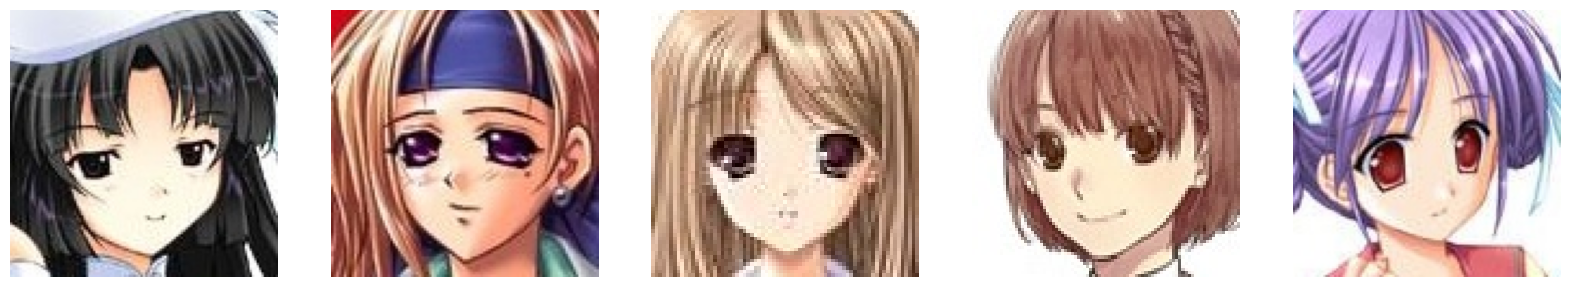

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt


image_directory = '/kaggle/input/animefacedataset/images'

all_files = os.listdir(image_directory)



image_files = [f for f in all_files if f.endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))]

random_images = random.sample(image_files, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, img_file in zip(axes, random_images):
    img_path = os.path.join(image_directory, img_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.show()




In [5]:
import cv2

import os
from PIL import Image
import numpy as np

# Define the directory containing images
image_dir = '/kaggle/input/animefacedataset/images'

# List all files in the directory
images_list = os.listdir(image_dir)
images = []
for i ,image_name in enumerate(images_list):
    if(image_name.split('.')[1]=='jpg'):
        image =cv2.imread("/kaggle/input/animefacedataset/images/"+ image_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((64,64))
        images.append(np.array(image))


In [6]:
images_array = np.array(images)
normalized_images = images_array/ 255.0

In [7]:
normalized_images.shape

(63565, 64, 64, 3)

# train test split

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split


train_images, test_images = train_test_split(normalized_images, test_size=0.25, random_state=42)

print(f'Training set shape: {train_images.shape}') 
print(f'Test set shape: {test_images.shape}')     

Training set shape: (47673, 64, 64, 3)
Test set shape: (15892, 64, 64, 3)


In [5]:
def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense, Lambda , Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

img_size = 64
num_channels = 3
latent_space_dim = 2  # Make sure to define this according to your requirements

# Encoder
x = Input(shape=(img_size, img_size, num_channels), name="encoder_input")

encoder_conv_layer1 = Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = LeakyReLU(name="encoder_leakyrelu_2")(encoder_norm_layer2)

encoder_conv_layer3 = Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = LeakyReLU(name="encoder_leakyrelu_3")(encoder_norm_layer3)

encoder_conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = LeakyReLU(name="encoder_leakyrelu_4")(encoder_norm_layer4)

encoder_conv_layer5 = Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = LeakyReLU(name="encoder_leakyrelu_5")(encoder_norm_layer5)

shape_before_flatten = K.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = Flatten()(encoder_activ_layer5)

encoder_mu = Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

encoder_mu_log_variance_model = Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")


encoder_output = Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

encoder = Model(x, encoder_output, name="encoder_model")

# Print the model summary
encoder.summary()


Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_1      │ (None, 64, 64, 1) │         28 │ encoder_input[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_1      │ (None, 64, 64, 1) │          4 │ encoder_conv_1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_1 │ (None, 64, 64, 1) │          0 │ encoder_norm_1[0… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_2      │ (None, 64, 64,    │        320 │ encoder_leakyrel… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_2      │ (None, 64, 64,    │        128 │ encoder_conv_2[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_2 │ (None, 64, 64,    │          0 │ encoder_norm_2[0… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_3      │ (None, 32, 32,    │     18,496 │ encoder_leakyrel… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_3      │ (None, 32, 32,    │        256 │ encoder_conv_3[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_3 │ (None, 32, 32,    │          0 │ encoder_norm_3[0… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_4      │ (None, 16, 16,    │     36,928 │ encoder_leakyrel… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_4      │ (None, 16, 16,    │        256 │ encoder_conv_4[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_4 │ (None, 16, 16,    │          0 │ encoder_norm_4[0… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_conv_5      │ (None, 16, 16,    │     36,928 │ encoder_leakyrel… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_norm_5      │ (None, 16, 16,    │        256 │ encoder_conv_5[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_leakyrelu_5 │ (None, 16, 16,    │          0 │ encoder_norm_5[0… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 16384)     │          0 │ encoder_leakyrel

 Total params: 159,140 (621.64 KB)

 Trainable params: 158,690 (619.88 KB)

 Non-trainable params: 450 (1.76 KB)

In [16]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

latent_space_dim = 2  # Example value, replace with the actual latent space dimension

# Correcting the shape for the input layer
decoder_input = Input(shape=(latent_space_dim,), name="decoder_input")

# First dense layer
decoder_dense_layer1 = Dense(units=np.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)

# Reshape layer
decoder_reshape = Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)

# First Conv2DTranspose layer
decoder_conv_tran_layer1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

# Second Conv2DTranspose layer
decoder_conv_tran_layer2 = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

# Third Conv2DTranspose layer
decoder_conv_tran_layer3 = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

# Fourth Conv2DTranspose layer
decoder_conv_tran_layer4 = Conv2DTranspose(filters=3, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4)

# Define the decoder model
decoder = Model(decoder_input, decoder_output, name="decoder_model")

# Print the model summary
decoder.summary()


Model: "decoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense_1 (Dense)         │ (None, 16384)          │        49,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_1             │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_1                  │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_1 (LeakyReLU) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_2             │ (None, 32, 32, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_2                  │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_2 (LeakyReLU) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_3             │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_norm_3                  │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_leakyrelu_3 (LeakyReLU) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_tran_4             │ (None, 64, 64, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (LeakyReLU)      │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,435 (634.51 KB)

 Trainable params: 162,051 (633.01 KB)

 Non-trainable params: 384 (1.50 KB)

In [17]:
vae_input = Input(shape=(img_size, img_size, num_channels), name="VAE_input")
vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)
vae = Model(vae_input, vae_decoder_output, name="VAE")
vae.summary()

Model: "VAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ VAE_input (InputLayer)          │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_model (Functional)      │ (None, 2)              │       159,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_model (Functional)      │ (None, 64, 64, 3)      │       162,435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,575 (1.23 MB)

 Trainable params: 320,741 (1.22 MB)

 Non-trainable params: 834 (3.26 KB)

In [5]:
from keras.models import Model
from keras import backend as K
from keras import metrics
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
from tensorflow.keras.layers import Input, Dense, Lambda, Conv2D, Flatten, Reshape, Conv2DTranspose,BatchNormalization,LeakyReLU,Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

NameError: name 'inputs' is not defined

In [19]:
from tensorflow.keras.optimizers import Adam

# Define your custom loss function
def loss_func(encoder_mu, encoder_log_variance):
    def vae_loss(y_true, y_pred):
        # Reconstruction loss
        reconstruction_loss = tensorflow.keras.losses.binary_crossentropy(y_true, y_pred)
        reconstruction_loss *= np.prod(y_true.shape[1:])
        
        # KL divergence
        kl_loss = -0.5 * tensorflow.keras.backend.sum(
            1 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=-1
        )
        
        return tensorflow.keras.backend.mean(reconstruction_loss + kl_loss)
    
    return vae_loss

# Compile the VAE model
vae.compile(optimizer=Adam(learning_rate=0.0005), loss=loss_func(encoder_mu, encoder_log_variance))

In [ ]:
vae.fit(train_images, train_images, epochs=3, batch_size=32, shuffle=False, validation_data=(test_images, test_images))


In [72]:

# Imports
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape, Lambda, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import MeanSquaredError
     

In [56]:

#VAE settings
latent_dim = 50
image_size = (64, 64, 3)
     

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from tensorflow.keras.models import Model


input = Input(shape=image_size)                    
x = Conv2D(16, 3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                      
x = Conv2D(32, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                         

x = Conv2D(64, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                

x = Conv2D(128, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                       
x = Flatten()(x)                              

x = Dense(128)(x)                        
x = LeakyReLU()(x)

mean = Dense(latent_dim)(x)                      
log_var = Dense(latent_dim)(x)                    

# Create the encoder model
encoder = Model(inputs=input, outputs=[mean, log_var])
encoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 32,    │        448 │ input_layer_8[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │      4,640 │ leaky_re_lu[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │     18,496 │ leaky_re_lu_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 8, 8, 128) │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 8192)      │          0 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │  1,048,704 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 128)       │          0 │ dense_18[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 50)        │      6,450 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 50)        │      6,450 │ leaky_re_lu_4[0]… │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 1,160,004 (4.43 MB)

 Trainable params: 1,159,524 (4.42 MB)

 Non-trainable params: 480 (1.88 KB)

In [61]:
#sampling from our constructed latent distribution/space using the reparameterization trick

def sample_from_latent_dist(latent_dist_params):
    mean, log_var = latent_dist_params

    batch = tf.shape(mean)[0]
    dim = tf.shape(mean)[1]
  #we throw our randomness into a new rv, epsilon to make our gradients with respect to the inputs deterministic.
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    res = mean + tf.exp(log_var*0.5)*epsilon
    return res

z = Lambda(sample_from_latent_dist, output_shape = (latent_dim,))([mean, log_var])

In [69]:
#Decoder Network for CelebA

output_input_shape = Input(shape=(latent_dim, ))             #(batch_size, latent_dim)

x = Dense(16*16*64)(output_input_shape) 
x = LeakyReLU()(x)
x = Reshape((16, 16, 128))(x)                              #(batch_size, 16, 16, 128)

x = Conv2DTranspose(128, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                              #(batch_size, 32, 32, 128)

x = Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                              #(batch_size, 64, 64, 64)

x = Conv2DTranspose(32, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                    #(batch_size, 128,128, 32)

decoder_output = Conv2DTranspose(3, 3,activation='sigmoid',padding='same')(x)   #(batch_size, 128, 128, 3)

decoder = Model(output_input_shape, decoder_output)

vae_output = decoder(z)

vae = Model(input, vae_output)


ValueError: The total size of the tensor must be unchanged. Received: input_shape=(16384,), target_shape=(16, 16, 128)

In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense, Layer, UpSampling2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

# Assuming image_size and latent_dim are already defined
image_size = (64, 64, 3)  # Example image size
latent_dim = 64  # Example latent dimension

# Define encoder
input_img = Input(shape=image_size)                    # (batch_size, 64, 64, 3)
x = Conv2D(16, 3, strides=2, padding='same')(input_img)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 32, 32, 16)

x = Conv2D(32, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 16, 16, 32)

x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 8, 8, 64)

x = Flatten()(x)                                       # (batch_size, 8*8*64)

x = Dense(128)(x)                                      # (batch_size, 128)
x = LeakyReLU()(x)

mean = Dense(latent_dim)(x)                            # (batch_size, latent_dim)
log_var = Dense(latent_dim)(x)                         # (batch_size, latent_dim)

encoder = Model(inputs=input_img, outputs=[mean, log_var], name='encoder')
encoder.summary()

# Define decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(8*8*64)(latent_inputs)
x = LeakyReLU()(x)
x = Reshape((8, 8, 64))(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 16, 16, 64)
x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 32, 32, 64)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 64, 64, 32)
x = Conv2D(16, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

output_img = Conv2D(3, 3, activation='sigmoid', padding='same')(x)  # (batch_size, 64, 64, 3)

decoder = Model(inputs=latent_inputs, outputs=output_img, name='decoder')
decoder.summary()

# Define VAE model
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        mean, log_var = self.encoder(inputs)
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(mean))
        z = mean + tf.exp(0.5 * log_var) * epsilon
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        with tf.GradientTape() as tape:
            mean, log_var = self.encoder(data)
            epsilon = tf.keras.backend.random_normal(shape=tf.shape(mean))
            z = mean + tf.exp(0.5 * log_var) * epsilon
            reconstructed = self.decoder(z)
            
            reconstruction_loss = tf.keras.losses.mean_squared_error(
                tf.keras.backend.flatten(data),
                tf.keras.backend.flatten(reconstructed)
            )
            reconstruction_loss *= 64 * 64 * 3
            
            kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
            kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
            kl_loss *= -0.5
            total_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.add_metric(reconstruction_loss, name='reconstruction_loss', aggregation='mean')
        self.add_metric(kl_loss, name='kl_loss', aggregation='mean')
        
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}

# Instantiate and compile the VAE model
vae = VAE(encoder, decoder)
adam = Adam(learning_rate=0.00003)
vae.compile(optimizer=adam)


2024-06-18 16:38:22.803838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 16:38:22.803955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 16:38:22.946336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      4,640 │ leaky_re_lu[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 64)  │     18,496 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4096)      │          0 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    524,416 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 128)       │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ leaky_re_lu_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 564,960 (2.16 MB)

 Trainable params: 564,736 (2.15 MB)

 Non-trainable params: 224 (896.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │       266,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,139 (1.25 MB)

 Trainable params: 326,915 (1.25 MB)

 Non-trainable params: 224 (896.00 B)

In [1]:
vae.fit(train_images, epochs=5, batch_size=16, validation_data=test_images)


NameError: name 'vae' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense, Layer, UpSampling2D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean

# Assuming image_size and latent_dim are already defined
image_size = (64, 64, 3)  # Example image size
latent_dim = 64  # Example latent dimension

# Define encoder
input_img = Input(shape=image_size)                    # (batch_size, 64, 64, 3)
x = Conv2D(16, 3, strides=2, padding='same')(input_img)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 32, 32, 16)

x = Conv2D(32, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 16, 16, 32)

x = Conv2D(64, 3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)                                     # (batch_size, 8, 8, 64)

x = Flatten()(x)                                       # (batch_size, 8*8*64)

x = Dense(128)(x)                                      # (batch_size, 128)
x = LeakyReLU()(x)

mean = Dense(latent_dim)(x)                            # (batch_size, latent_dim)
log_var = Dense(latent_dim)(x)                         # (batch_size, latent_dim)

encoder = Model(inputs=input_img, outputs=[mean, log_var], name='encoder')
encoder.summary()

# Define decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(8*8*64)(latent_inputs)
x = LeakyReLU()(x)
x = Reshape((8, 8, 64))(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 16, 16, 64)
x = Conv2D(64, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 32, 32, 64)
x = Conv2D(32, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = UpSampling2D(size=(2, 2))(x)                       # (batch_size, 64, 64, 32)
x = Conv2D(16, 3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

output_img = Conv2D(3, 3, activation='sigmoid', padding='same')(x)  # (batch_size, 64, 64, 3)

decoder = Model(inputs=latent_inputs, outputs=output_img, name='decoder')
decoder.summary()

# Define VAE model
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.reconstruction_loss_metric = Mean(name='reconstruction_loss')
        self.kl_loss_metric = Mean(name='kl_loss')

    def call(self, inputs):
        mean, log_var = self.encoder(inputs)
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(mean))
        z = mean + tf.exp(0.5 * log_var) * epsilon
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        with tf.GradientTape() as tape:
            mean, log_var = self.encoder(data)
            epsilon = tf.keras.backend.random_normal(shape=tf.shape(mean))
            z = mean + tf.exp(0.5 * log_var) * epsilon
            reconstructed = self.decoder(z)
            
            reconstruction_loss = MeanSquaredError()(tf.keras.backend.flatten(data),
                                                    tf.keras.backend.flatten(reconstructed))
            reconstruction_loss *= 64 * 64 * 3
            
            kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
            kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
            kl_loss *= -0.5
            total_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        
        # Update metrics
        self.reconstruction_loss_metric.update_state(reconstruction_loss)
        self.kl_loss_metric.update_state(kl_loss)
        
        return {"loss": total_loss, "reconstruction_loss": self.reconstruction_loss_metric.result(),
                "kl_loss": self.kl_loss_metric.result()}

# Instantiate and compile the VAE model
vae = VAE(encoder, decoder)
adam = Adam(learning_rate=0.00003)
vae.compile(optimizer=adam)

# Assuming train_images and test_images are defined
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16

train_generator = train_datagen.flow(train_images, batch_size=batch_size)
val_generator = val_datagen.flow(test_images, batch_size=batch_size)

# Fit the model
vae.fit(train_generator, epochs=3, validation_data=val_generator)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 32, 32,    │        448 │ input_layer_12[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_48      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 16, 16,    │      4,640 │ leaky_re_lu_48[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_49      │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ leaky_re_lu_49[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_50      │ (None, 8, 8, 64)  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 4096)      │          0 │ leaky_re_lu_50[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │    524,416 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_51      │ (None, 128)       │          0 │ dense_24[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │      8,256 │ leaky_re_lu_51[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │      8,256 │ leaky_re_lu_51[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 564,960 (2.16 MB)

 Trainable params: 564,736 (2.15 MB)

 Non-trainable params: 224 (896.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4096)           │       266,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_52 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_18 (UpSampling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_53 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_19 (UpSampling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_54 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_20 (UpSampling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_55 (LeakyReLU)      │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 64, 64, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,139 (1.25 MB)

 Trainable params: 326,915 (1.25 MB)

 Non-trainable params: 224 (896.00 B)